In [16]:
from google.colab import files
uploaded = files.upload()


Saving 3.png to 3 (1).png


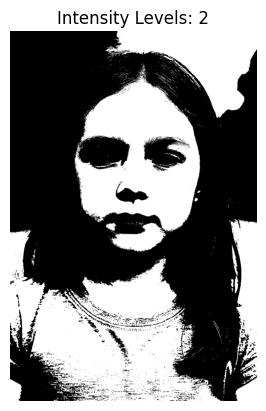

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

img_path = list(uploaded.keys())[0]
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

levels = 2  # You can change this to 2, 4, 8, 16, ...
reduced_img = reduce_intensity_levels(gray_img, levels)
cv2.imwrite('reduced_levels.png', reduced_img)

# Display
plt.imshow(reduced_img, cmap='gray')
plt.title(f'Intensity Levels: {levels}')
plt.axis('off')
plt.show()


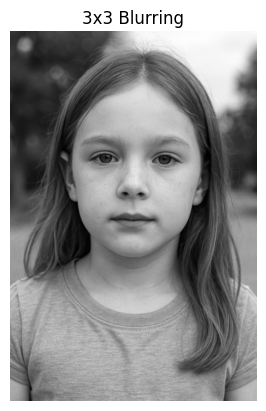

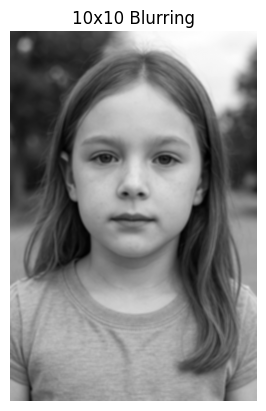

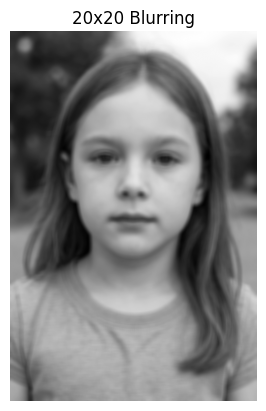

In [18]:
def spatial_averaging(image, kernels=[3, 10, 20]):
    for k in kernels:
        blurred = cv2.blur(image, (k, k))
        cv2.imwrite(f'blurred_{k}x{k}.png', blurred)
        plt.imshow(blurred, cmap='gray')
        plt.title(f'{k}x{k} Blurring')
        plt.axis('off')
        plt.show()

spatial_averaging(gray_img)


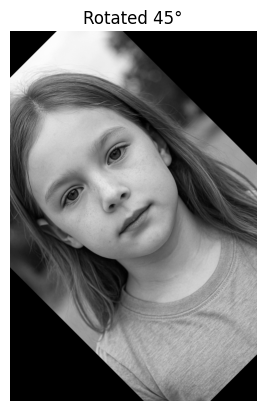

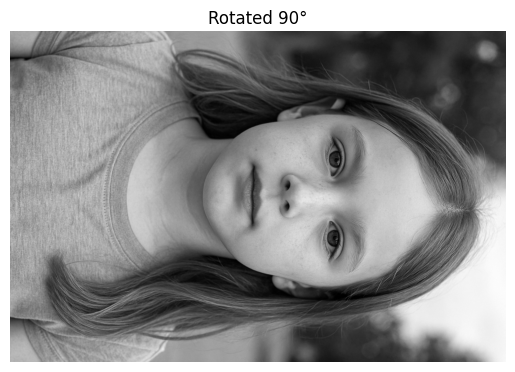

In [19]:
def rotate_image(image):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    rot45 = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_45 = cv2.warpAffine(image, rot45, (w, h))

    rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    cv2.imwrite("rotated_45.png", rotated_45)
    cv2.imwrite("rotated_90.png", rotated_90)

    # Show
    plt.imshow(rotated_45, cmap='gray')
    plt.title("Rotated 45°")
    plt.axis("off")
    plt.show()

    plt.imshow(rotated_90, cmap='gray')
    plt.title("Rotated 90°")
    plt.axis("off")
    plt.show()

rotate_image(gray_img)


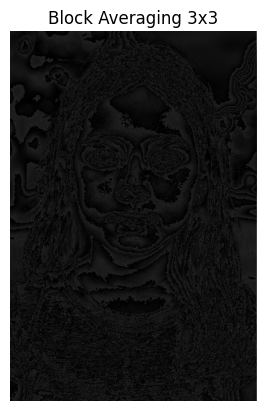

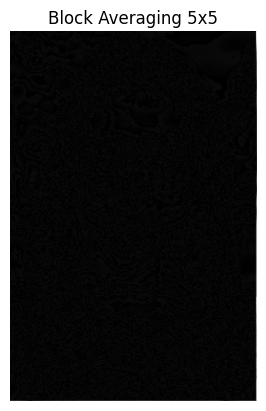

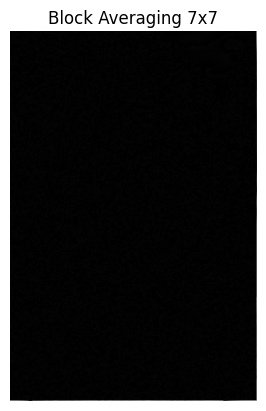

In [28]:
def block_averaging(image, block_sizes=[3, 5, 7]):
    h, w = image.shape
    for size in block_sizes:
        output = image.copy()
        for i in range(0, h, size):
            for j in range(0, w, size):
                block = image[i:i+size, j:j+size]
                if block.shape[0] == size and block.shape[1] == size:
                    avg = np.mean(block, dtype=np.uint8)
                    output[i:i+size, j:j+size] = avg
        cv2.imwrite(f'block_avg_{size}x{size}.png', output)
        plt.imshow(output, cmap='gray')
        plt.title(f'Block Averaging {size}x{size}')
        plt.axis('off')
        plt.show()

block_averaging(gray_img)
